<a href="https://colab.research.google.com/github/Elwing-Chou/ximen0725/blob/main/regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

bmi body mass index

bp average blood pressure

s1 tc, total serum cholesterol

s2 ldl, low-density lipoproteins

s3 hdl, high-density lipoproteins

s4 tch, total cholesterol / HDL

s5 ltg, possibly log of serum triglycerides level

s6 glu, blood sugar level

In [1]:
import pandas as pd
from sklearn.datasets import load_diabetes
diabetes = load_diabetes(scaled=False)
datas = pd.DataFrame(diabetes["data"], columns=diabetes["feature_names"])
datas["ans"] = diabetes["target"]
datas

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,ans
0,59.0,2.0,32.1,101.00,157.0,93.2,38.0,4.00,4.8598,87.0,151.0
1,48.0,1.0,21.6,87.00,183.0,103.2,70.0,3.00,3.8918,69.0,75.0
2,72.0,2.0,30.5,93.00,156.0,93.6,41.0,4.00,4.6728,85.0,141.0
3,24.0,1.0,25.3,84.00,198.0,131.4,40.0,5.00,4.8903,89.0,206.0
4,50.0,1.0,23.0,101.00,192.0,125.4,52.0,4.00,4.2905,80.0,135.0
...,...,...,...,...,...,...,...,...,...,...,...
437,60.0,2.0,28.2,112.00,185.0,113.8,42.0,4.00,4.9836,93.0,178.0
438,47.0,2.0,24.9,75.00,225.0,166.0,42.0,5.00,4.4427,102.0,104.0
439,60.0,2.0,24.9,99.67,162.0,106.6,43.0,3.77,4.1271,95.0,132.0
440,36.0,1.0,30.0,95.00,201.0,125.2,42.0,4.79,5.1299,85.0,220.0


In [2]:
from sklearn.model_selection import train_test_split
# demo
# train_test_split([1, 2, 3, 4],
#          [5, 6, 7, 8],
#          [9, 10, 11, 12],
#          test_size=0.25)
# demo(axis=1)
x = datas.drop("ans", axis=1)
y = datas["ans"]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1)

In [24]:
from sklearn.tree import DecisionTreeRegressor
reg = DecisionTreeRegressor(max_depth=4)
reg.fit(x_train, y_train)

DecisionTreeRegressor(max_depth=4)

[Text(0.5, 0.875, 's5 <= 4.6\nsquared_error = 6045.537\nsamples = 397\nvalue = 153.652'),
 Text(0.25, 0.625, 'bmi <= 26.95\nsquared_error = 3234.711\nsamples = 195\nvalue = 109.323'),
 Text(0.125, 0.375, 's2 <= 187.4\nsquared_error = 2237.352\nsamples = 158\nvalue = 97.392'),
 Text(0.0625, 0.125, '\n  (...)  \n'),
 Text(0.1875, 0.125, '\n  (...)  \n'),
 Text(0.375, 0.375, 's5 <= 4.143\nsquared_error = 4290.251\nsamples = 37\nvalue = 160.27'),
 Text(0.3125, 0.125, '\n  (...)  \n'),
 Text(0.4375, 0.125, '\n  (...)  \n'),
 Text(0.75, 0.625, 'bmi <= 28.05\nsquared_error = 5030.712\nsamples = 202\nvalue = 196.446'),
 Text(0.625, 0.375, 'bmi <= 23.7\nsquared_error = 3810.176\nsamples = 106\nvalue = 166.264'),
 Text(0.5625, 0.125, '\n  (...)  \n'),
 Text(0.6875, 0.125, '\n  (...)  \n'),
 Text(0.875, 0.375, 'bmi <= 32.75\nsquared_error = 4262.01\nsamples = 96\nvalue = 229.771'),
 Text(0.8125, 0.125, '\n  (...)  \n'),
 Text(0.9375, 0.125, '\n  (...)  \n')]

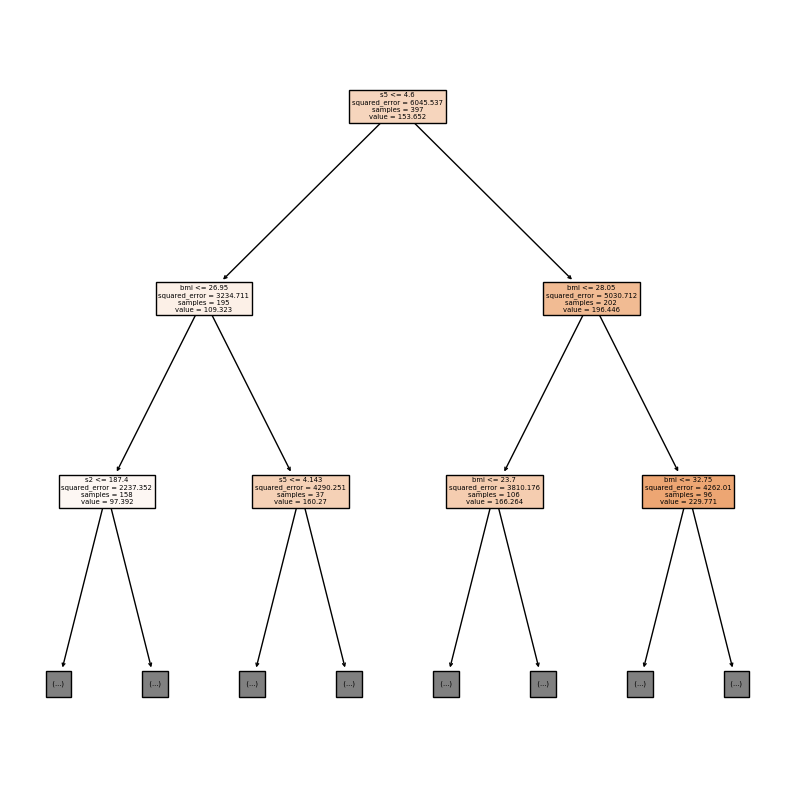

In [26]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
plt.figure(figsize=(10, 10))
plot_tree(reg,
     feature_names=x.columns,
     filled=True,
     max_depth=2)

In [5]:
from sklearn.metrics import r2_score
pre = reg.predict(x_test)
r2_score(y_test, pre)

0.22939039365165226

In [23]:
import numpy as np
from sklearn.model_selection import cross_val_score
reg = DecisionTreeRegressor(max_depth=4)
scores = cross_val_score(reg, x, y, scoring="r2", cv=10, n_jobs=-1)
print(scores)
print(np.average(scores))

[0.22141646 0.22140442 0.22803328 0.47180757 0.21802868 0.5615236
 0.38921616 0.05408302 0.18298856 0.19064669]
0.27391484383257425
